In [26]:
import numpy as np
import math as m
import astropy
import aplpy
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline
from astropy.io import fits
from astropy.utils.data import download_file
from astropy.wcs import WCS
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.wcs.utils import skycoord_to_pixel
from astropy.wcs.utils import pixel_to_skycoord
from astropy.utils.data import get_pkg_data_filename
import matplotlib.patheffects as PathEffects
import scipy.optimize as opt
from matplotlib.patches import Circle as circ

In [27]:
def plotLine(xCoord, yCoord, angle, length, couleur,width):
    #print(np.sin(m.radians(angle)))
    if np.sin(angle) < 0.00000001 and np.sin(angle) > -0.00000001: #if vertical line
        yChange = float(length)
        xChange = 0
        
        yInitial = float(yCoord) - float(yChange/2)
        xInitial = float(xCoord)
        
        yFinal = yInitial + yChange
        
        if yChange <= 1 and yChange > 0:
            yLin = 20
        elif yChange > 1:
            yLin = int(yChange * 2)
           
        yList = np.linspace(yInitial, yFinal, yLin)
        xList = [xCoord]*yLin
        
        #print(xList,yList)
        
    else: #not vertical line 
        #print(np.sin(angle), length)
        xChange = float(np.sin(angle)) * float(length)
        yChange = float(np.cos(angle)) * float(length)
        #print("xChange is",xChange)
        xInitial = float(xCoord) - float(xChange/2)
        yInitial = float(yCoord) - float(yChange/2)
    
        xFinal = xInitial + xChange
        slope = 1/np.tan(angle)
        
        #print(slope)
        
        y0 = yCoord - slope*xCoord
        
        if xChange < 0:
            xChange = xChange *-1
            
        
        if xChange <= 1 and xChange > 0:
            xLin = 20
        elif xChange > 1:
            xLin = int(xChange * 2)
        else:
            xLin = 20

    
        xList = np.linspace(xInitial, xFinal, xLin)
        yList = [slope*i + y0 for i in xList]
        
        
        
        
    #print(np.cos(angle))
    #print(xChange, yChange)
    #print(xList, yList, yInitial, yFinal)
    plt.plot(xList, yList, color=couleur, linewidth = width, path_effects=[PathEffects.withStroke(linewidth=2.5,
                                                                                  foreground="black")])
     
    
def plotLineList(RaList, DecList, wcs, angleList, lengthList, couleur,width):
    for i in range(0,len(RaList)):
        #print(RaList[i],DecList[i],angleList[i],lengthList[i])
        #print(abs(lengthList[i]/100))
        plotLine(RaList[i],DecList[i],-1*angleList[i]+np.pi/2,abs(lengthList[i])/5,couleur,width)
        
def plotArrow(xCoord,yCoord,angle,length):
    #print(np.sin(m.radians(angle)))
    if np.sin(angle) < 0.00000001 and np.sin(angle) > -0.00000001: #if vertical line
        yChange = abs(float(length))
        xChange = 0
        
        yInitial = float(yCoord) - float(yChange/2)
        xInitial = float(xCoord)
        
        xFinal = xInitial + xChange
        yFinal = yInitial + yChange
        #print(xList,yList)
        
    else: #not vertical line 
        #print(np.sin(angle), length)
        xChange = abs(float(np.sin(angle)) * float(length))
        yChange = abs(float(np.cos(angle)) * float(length))
        #print("xChange is",xChange)
        xInitial = float(xCoord) - float(xChange/2)
        yInitial = float(yCoord) - float(yChange/2)
        
        xFinal = xInitial + xChange
        yFinal = yInitial + yChange    
        
        
        
    
    #print(np.cos(angle))
    #print(xChange, yChange)
    #print(xList, yList, yInitial, yFinal)
    plt.arrow(xCoord, yCoord, xChange/2,yChange/2,width=0.01,head_width=1,color='blue')
    plt.arrow(xCoord, yCoord, -xChange/2,-yChange/2,width=0.01,head_width=1,color='red')

In [28]:
Ihdu_list = fits.open('l483_iext_mJysqa_8as.fits')
Ihdu = fits.open('l483_iext_mJysqa_8as.fits')[0]
Iwcs = WCS(Ihdu.header)
#Ihdu.header
Iimage_data = Ihdu_list[0].data

IVar = Ihdu_list[1].data


IData = []
IPolData = []
for i in range(0, len(Iimage_data[0])):
    for j in range(0, len(Iimage_data[0][i])):
        IPolData.append([j,i,Iimage_data[0][i][j]])
        IData.append(Iimage_data[0][i][j])
        
IVarData = []
for i in range(0, len(IVar[0])):
    for j in range(0, len(IVar[0][i])):
        IVarData.append([j,i,IVar[0][i][j]])
        

        
        
Qhdu_list = fits.open('l483_qext_mJysqa_8as.fits')
Qhdu = fits.open('l483_qext_mJysqa_8as.fits')[0]
Qwcs = WCS(Qhdu.header)
#Qhdu.header
Qimage_data = Qhdu_list[0].data

QVar = Qhdu_list[1].data

QData = []
QPolData = []
for i in range(0, len(Qimage_data[0])):
    for j in range(0, len(Qimage_data[0][i])):
        #print([i,j,Qimage_data[0][i][j]])
        QPolData.append([j,i,Qimage_data[0][i][j]])
        QData.append(Qimage_data[0][i][j])

QVarData = []
for i  in range(0, len(QVar[0])):
    for j in range(0, len(QVar[0][i])):
        #print([i,j,QVar[0][i][j]])
        QVarData.append([j,i,QVar[0][i][j]])
        
        

        
Uhdu_list = fits.open('l483_uext_mJysqa_8as.fits')
Uhdu = fits.open('l483_uext_mJysqa_8as.fits')[0]
Uwcs = WCS(Uhdu.header)
#Uhdu.header
Uimage_data = Uhdu_list[0].data

UVar = Uhdu_list[1].data


UData = []
UPolData = []
for i in range(0, len(Uimage_data[0])):
    for j in range(0, len(Uimage_data[0][i])):
        UPolData.append([j,i,Uimage_data[0][i][j]])
        UData.append(Uimage_data[0][i][j])
        
UVarData = []
for i in range(0, len(UVar[0])):
    for j in range(0, len(UVar[0][i])):
        UVarData.append([j,i,UVar[0][i][j]])
        
        
        
        
        
PolDataC = []
for i in range(0,len(QPolData)):
    PolDataC.append([QPolData[i][0],QPolData[i][1],IPolData[i][2],QPolData[i][2],UPolData[i][2]])
    
PolVar = []
for i in range(0,len(QVarData)):
    PolVar.append([QVarData[i][0],QVarData[i][1],IVarData[i][2],QVarData[i][2],UVarData[i][2]])
    
sigI=0.02718023855912932

Set OBSGEO-B to    19.822855 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


In [29]:
PolData = []
for i in range(0,len(PolDataC)):
    #print(PolDataC[i][3])
    #print(np.isnan(PolDataC[i][3]))
    if np.isnan(PolDataC[i][3]) == False:
        
        IPVar = np.sqrt(((PolDataC[i][3]*np.sqrt(PolVar[i][3]))**2+(PolDataC[i][4]*np.sqrt(PolVar[i][4]))**2)/(PolDataC[i][3]**2+PolDataC[i][4]**2))
        IPol = np.sqrt(PolDataC[i][3]**2+PolDataC[i][4]**2-IPVar**2)
        
        
        coef = 100/abs(PolDataC[i][2])
        polFrac = coef*IPol
        PVar = polFrac*np.sqrt((IPVar/IPol)**2+(np.sqrt(PolVar[i][2])/PolDataC[i][2])**2)
        
        polAng = 0.5*np.arctan2(PolDataC[i][4],PolDataC[i][3])
                   
        angVar = 0.5*np.sqrt((PolDataC[i][3]*np.sqrt(PolVar[i][3]))**2+(PolDataC[i][4]*np.sqrt(PolVar[i][4]))**2)/(PolDataC[i][3]**2+PolDataC[i][4]**2)
        
        
        PolData.append([PolDataC[i][0],PolDataC[i][1],PolDataC[i][2],PolVar[i][2],polFrac,PVar,polAng,angVar,IPol,IPVar]) 

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in sqrt
  


In [30]:
PolAng4 = []
PolAng3 = []
PolAng35 = []
PolAngCent = []
PolAngEast = []
PolAngWest = []
PolData4 = []
PolData2 = []
PolDataNormAng4 = []
PolDataNormAng2 = []
for i in range(len(PolData)):
    if PolData[i][2] > 10*sigI:
        if m.degrees(PolData[i][7]) < 10:
            if PolData[i][5] < 5:
                if PolData[i][8] > 4*PolData[i][9]:
                    PolData4.append([PolData[i][0],PolData[i][1],PolData[i][4],PolData[i][6]])
                    PolDataNormAng4.append([PolData[i][0],PolData[i][1],5,PolData[i][6]])
                    PolAng4.append(m.degrees(PolData[i][6])+90)
                    PolAng3.append(m.degrees(PolData[i][6])+90)
                    PolAng35.append(m.degrees(PolData[i][6])+90)
                    if PolData[i][0] > 72 and PolData[i][0] < 76:
                        PolAngCent.append(m.degrees(PolData[i][6])+90)
                    elif PolData[i][0] < 73:
                        PolAngEast.append(m.degrees(PolData[i][6])+90)
                    elif PolData[i][0] > 75:
                        PolAngWest.append(m.degrees(PolData[i][6])+90)
                elif PolData[i][8] > 3*PolData[i][9]:
                    PolDataNormAng2.append([PolData[i][0],PolData[i][1],5,PolData[i][6]])
                    PolData2.append([PolData[i][0],PolData[i][1],PolData[i][4],PolData[i][6]])
                    PolAng3.append(m.degrees(PolData[i][6])+90)
                    if PolData[i][0] > 72 and PolData[i][0] < 76:
                        PolAngCent.append(m.degrees(PolData[i][6])+90)
                    elif PolData[i][0] < 73:
                        PolAngEast.append(m.degrees(PolData[i][6])+90)
                    elif PolData[i][0] > 75:
                        PolAngWest.append(m.degrees(PolData[i][6])+90)
                    if PolData[i][8] > 3.5*PolData[i][9]:
                        PolAng35.append(m.degrees(PolData[i][6])+90)
                        if PolData[i][0] > 72 and PolData[i][0] < 76:
                            PolAngCent.append(m.degrees(PolData[i][6])+90)
                        elif PolData[i][0] < 73:
                            PolAngEast.append(m.degrees(PolData[i][6])+90)
                        elif PolData[i][0] > 75:
                            PolAngWest.append(m.degrees(PolData[i][6])+90)

In [31]:
pixelRaNormAng2=[]
pixelDecNormAng2=[]
angleListNormAng2=[]
lengthListNormAng2=[]
for i in range(len(PolDataNormAng2)):
    pixelRaNormAng2.append(PolDataNormAng2[i][0])
    pixelDecNormAng2.append(PolDataNormAng2[i][1])
    lengthListNormAng2.append(PolDataNormAng2[i][2])
    angleListNormAng2.append(PolDataNormAng2[i][3])

pixelRaNormAng4=[]
pixelDecNormAng4=[]
angleListNormAng4=[]
lengthListNormAng4=[]
for i in range(len(PolDataNormAng4)):
    pixelRaNormAng4.append(PolDataNormAng4[i][0])
    pixelDecNormAng4.append(PolDataNormAng4[i][1])
    lengthListNormAng4.append(PolDataNormAng4[i][2])
    angleListNormAng4.append(PolDataNormAng4[i][3])
    
    
pixelRa4=[]
pixelDec4=[]
angleList4=[]
lengthList4=[]
for i in range(len(PolData4)):
    pixelRa4.append(PolData4[i][0])
    pixelDec4.append(PolData4[i][1])
    lengthList4.append(PolData4[i][2])
    angleList4.append(PolData4[i][3])

    
pixelRa2=[]
pixelDec2=[]
angleList2=[]
lengthList2=[]
for i in range(len(PolData2)):
    pixelRa2.append(PolData2[i][0])
    pixelDec2.append(PolData2[i][1])
    lengthList2.append(PolData2[i][2])
    angleList2.append(PolData2[i][3])

## Sigma distributions

Mean angle is: 155.74004160499183
Standard Deviation is: 11.3914644727963


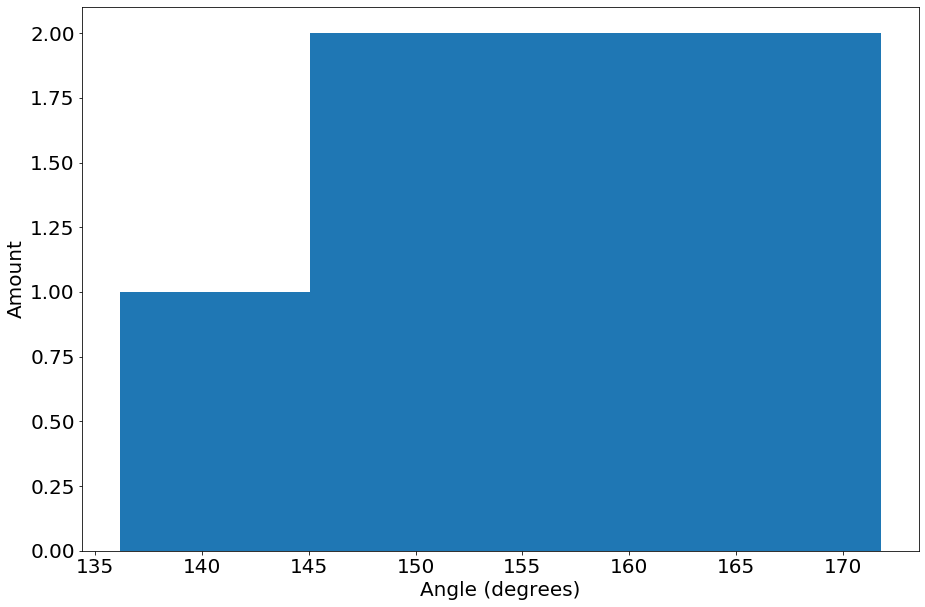

In [32]:
print("Mean angle is:", np.mean(PolAng4))
print("Standard Deviation is:",np.std(PolAng4))


plt.rcParams.update({'font.size':20})
plt.figure(figsize=(15,10))
plt.xlabel('Angle (degrees)',fontsize='20')
plt.ylabel('Amount',fontsize='20')
#plt.title('Angle Distribution (IP > 4-sigma)',fontsize='30')
nAng4,binsAng4,patchesAng4 = plt.hist(PolAng4,4)
plt.savefig('4sig_angDisp.png')

In [33]:
print(np.max(PolAng3))
print(np.max(PolAng4))

171.76864364682461
171.76864364682461


Mean angle is: 115.59335856392366
Standard Deviation is: 46.30954218152825
Standard Deviation is: (after shift) 46.30954218152825


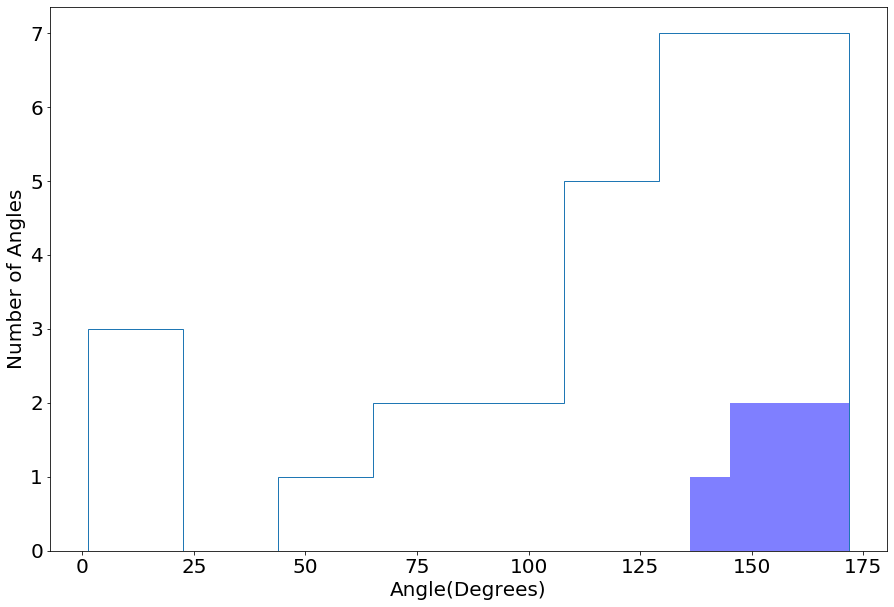

In [48]:
print("Mean angle is:", np.mean(PolAng3))
print("Standard Deviation is:",np.std(PolAng3))

        
print("Standard Deviation is: (after shift)",np.std(PolAng3)) 
plt.rcParams.update({'font.size':20})
plt.figure(figsize=(15,10))
plt.xlabel('Angle(Degrees)',fontsize='20')
plt.ylabel('Number of Angles',fontsize='20')
#plt.title('Angle Distribution (IP > 3-sigma)',fontsize='30')
plt.hist(PolAng3,8,histtype = 'step')
plt.hist(PolAng4,4, color = 'blue', alpha = 0.5)
plt.savefig('both_angDisp.png')

In [35]:
#find the bin centers
bin_centAng3=np.zeros(len(binsAng3)-1) #sets each 0 by definition

#assigns the bin centers

for i in range(0,len(binsAng3)-1):
    bin_centAng3[i]=0.5*(binsAng3[i]+binsAng3[i+1])
    
sig2Ang3=np.ones(len(nAng3)) 

for i in range(0,len(nAng3)):
    if nAng3[i]!=0:
        sig2Ang3[i]=np.sqrt(nAng3[i])
    else:
        sig2Ang3[i]-1
        
def gaussian(x,*p): #defines the gaussian
    return p[0]*np.exp(-1*(x-p[1])**2/(2*p[2]**2))

g_parAng3,g_covAng3 = opt.curve_fit(gaussian,bin_centAng3,nAng3,sigma=sig2Ang3,p0=(6,130,40))
gfitAng3 = gaussian(bin_centAng3,g_parAng3[0],g_parAng3[1],g_parAng3[2])

Standard Deviation according to best fit: 47.16436833349512


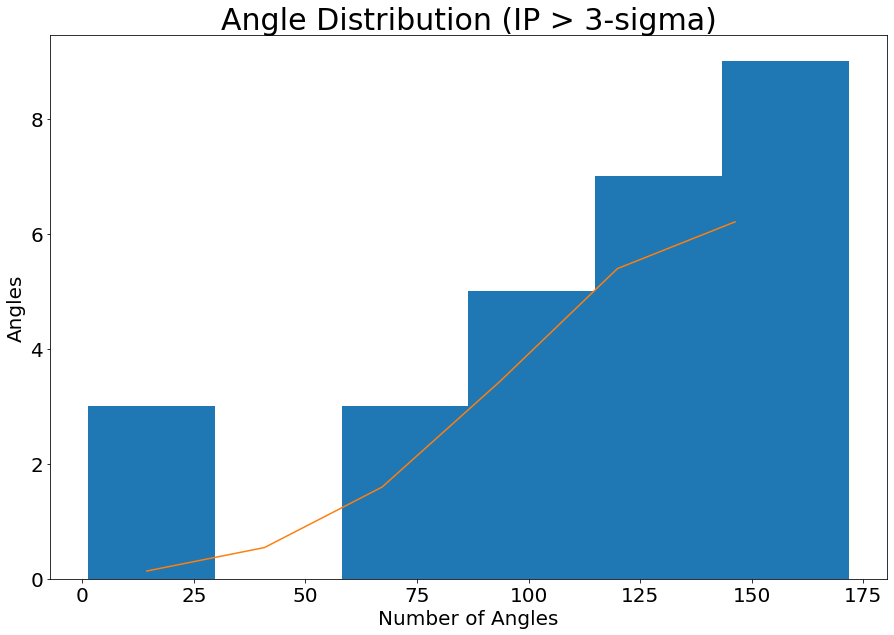

In [36]:
print("Standard Deviation according to best fit:", g_parAng3[2])
plt.figure(figsize=(15,10))
plt.xlabel('Number of Angles',fontsize='20')
plt.ylabel('Angles',fontsize='20')
plt.title('Angle Distribution (IP > 3-sigma)',fontsize='30')
plt.hist(PolAng3,6)
plt.plot(bin_centAng3,gfitAng3,'-', label = 'Gaussian')
plt.show()

Mean angle is: 131.1005887892321
Standard Deviation is: 39.189585292004175
Standard Deviation is (after shifting): 28.78091998073015
13


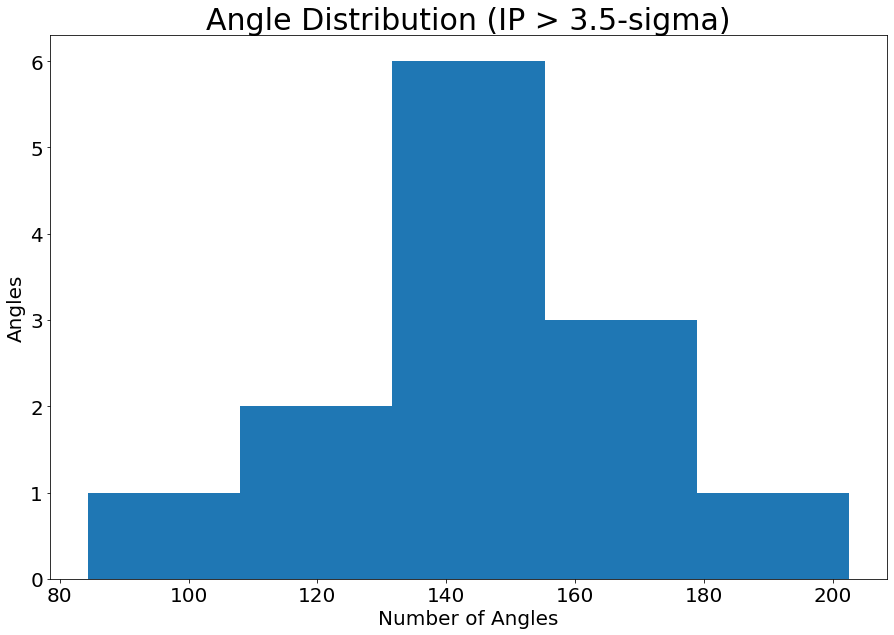

In [37]:
print("Mean angle is:", np.mean(PolAng35))
print("Standard Deviation is:",np.std(PolAng35))

for i in range(len(PolAng35)):
    if PolAng35[i] < 40:
        PolAng35[i] += 180
        
print("Standard Deviation is (after shifting):",np.std(PolAng35))

print(len(PolAng35))
plt.figure(figsize=(15,10))
plt.xlabel('Number of Angles',fontsize='20')
plt.ylabel('Angles',fontsize='20')
plt.title('Angle Distribution (IP > 3.5-sigma)',fontsize='30')
nAng35,binsAng35,patchesAng35 = plt.hist(PolAng35,5)

## Regions

Mean angle is: 140.7116133707372
Standard Deviation is: 21.213307384717062


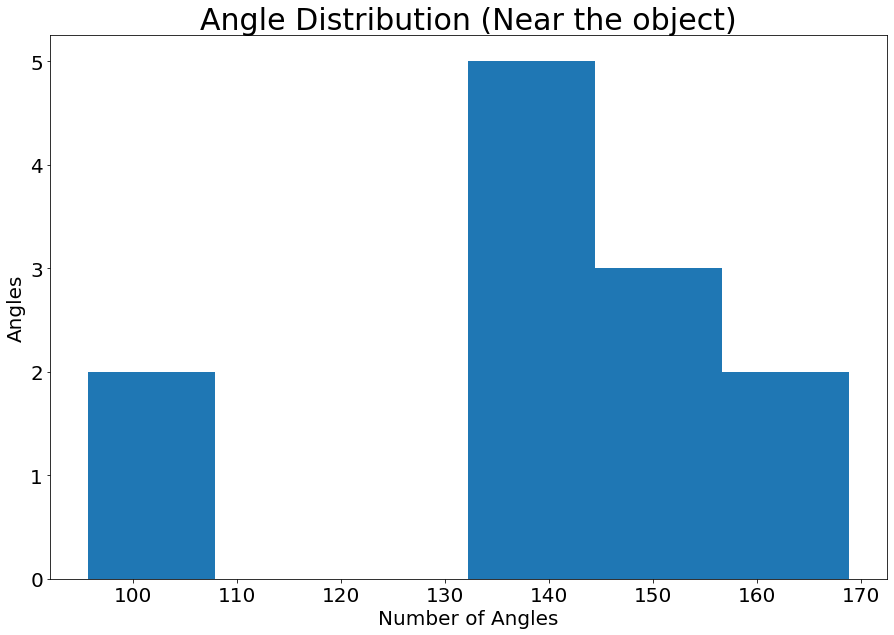

In [38]:
print("Mean angle is:", np.mean(PolAngCent))
print("Standard Deviation is:",np.std(PolAngCent))
plt.figure(figsize=(15,10))
plt.xlabel('Number of Angles',fontsize='20')
plt.ylabel('Angles',fontsize='20')
plt.title('Angle Distribution (Near the object)',fontsize='30')
nAngCent,binsAngCent,patchesAngCent = plt.hist(PolAngCent,6)

In [39]:
outCoords = SkyCoord('18h17m29.93s','-4d39m39.6s',frame='fk5')
pixCoords = skycoord_to_pixel(outCoords,Iwcs)
pixRaOut = pixCoords[0]
pixDecOut = pixCoords[1]
lengthOut =  20
angleOut = m.radians(105)

INFO: Setting slices=[0] [aplpy.core]


Set OBSGEO-B to    19.822855 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


INFO: Auto-setting vmin to -7.265e-01 [aplpy.core]
INFO: Auto-setting vmax to  1.073e+00 [aplpy.core]


<Figure size 720x720 with 0 Axes>

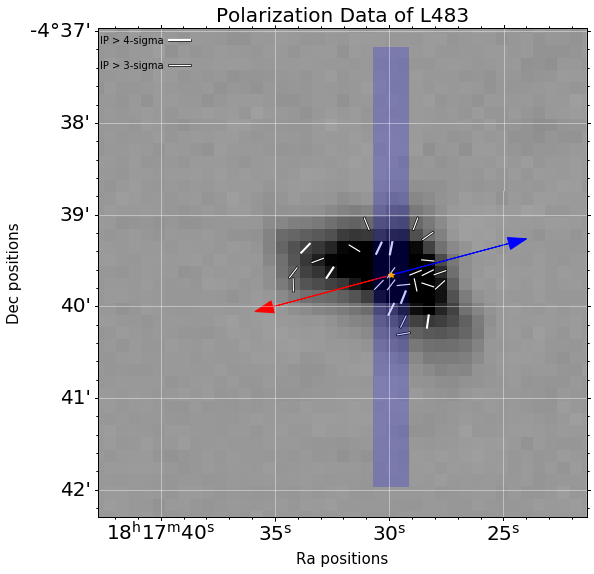

In [40]:
fig = plt.figure(figsize=(10, 10))
image = aplpy.FITSFigure('l483_iext_mJysqa_8as.fits')
image.add_grid()
image.show_colorscale(cmap='binary')


plt.text(50.2,83.7,'IP > 3-sigma',color='black',fontsize=10)
plotLine(56.7,84,m.radians(90),5/3, 'white',1.2)

plt.text(50.2,85.7,'IP > 4-sigma',color='black',fontsize=10)
plotLine(56.7,86,m.radians(90),5/3, 'white',2.2)


plt.title('Polarization Data of L483',fontsize = 20)
plt.xlim([50,90])
plt.ylim([47,87])
plt.xlabel('Ra positions',fontsize = 15)
plt.ylabel('Dec positions',fontsize = 15)

yList1 = np.linspace(50,85,150)
xList1 = [73]*len(yList1)
xList2 = [74]*len(yList1)
xList3 = [75]*len(yList1)

plotLineList(pixelRaNormAng2, pixelDecNormAng2, Iwcs, angleListNormAng2, lengthListNormAng2, 'white',1.2)
plotLineList(pixelRaNormAng4, pixelDecNormAng4, Iwcs, angleListNormAng4, lengthListNormAng4, 'white',2.2)
plt.plot(xList1,yList1, color = 'blue', linestyle = '-', linewidth = 12, alpha = 0.2)
plt.plot(xList2,yList1, color = 'blue', linestyle =  '-', linewidth = 12, alpha = 0.2)
plt.plot(xList3,yList1, color = 'blue', linestyle = '-', linewidth = 12, alpha = 0.2)
plt.plot(pixRaOut,pixDecOut, marker = '*', color  = 'orange')
plotArrow(pixRaOut,pixDecOut,-angleOut,lengthOut)
plt.show()

Mean angle is: 83.48449717791074
Standard Deviation is: 54.28810748219645
Standard Deviation is: (after shift) 44.48659642821208


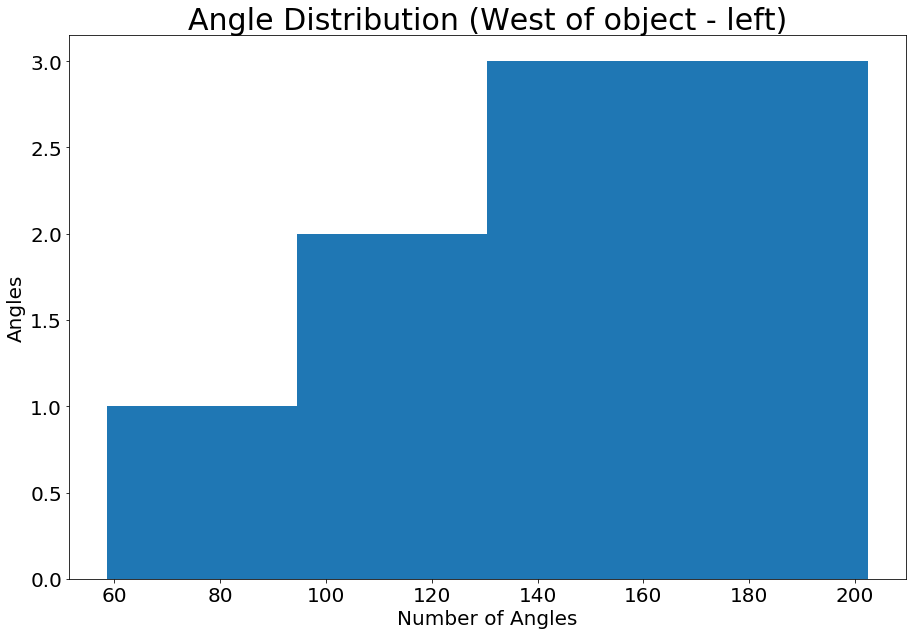

In [41]:
print("Mean angle is:", np.mean(PolAngEast))
print("Standard Deviation is:",np.std(PolAngEast))

for i in range(len(PolAngEast)):
    if PolAngEast[i] < 30:
        PolAngEast[i] += 180

print("Standard Deviation is: (after shift)",np.std(PolAngEast))        
plt.figure(figsize=(15,10))
plt.xlabel('Number of Angles',fontsize='20')
plt.ylabel('Angles',fontsize='20')
plt.title('Angle Distribution (West of object - left)',fontsize='30')
nAngEast,binsAngEast,patchesAngEast = plt.hist(PolAngEast,4)

Mean angle is: 107.93735076674757
Standard Deviation is: 40.13162120180264


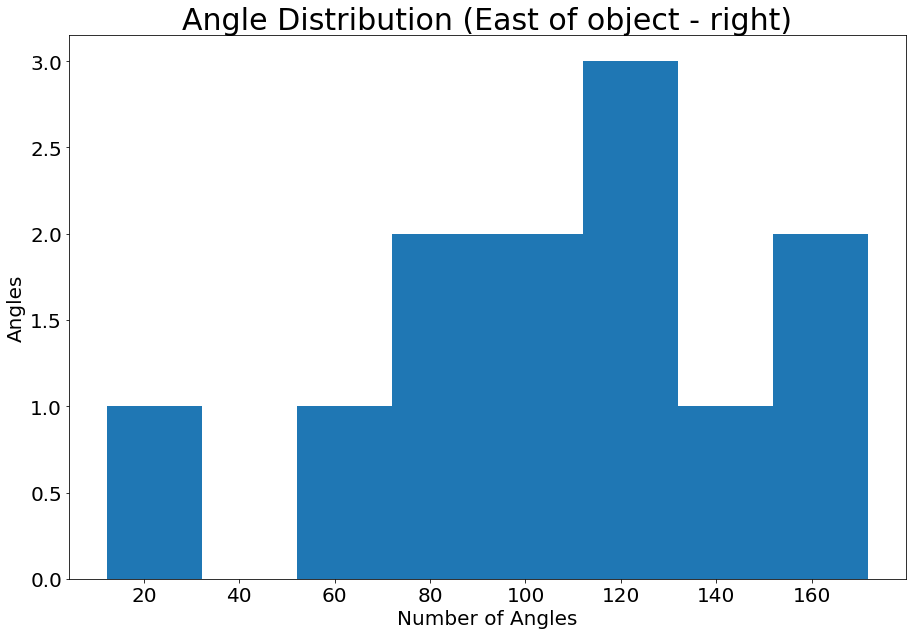

In [42]:
print("Mean angle is:", np.mean(PolAngWest))
print("Standard Deviation is:",np.std(PolAngWest))

#for i in range(len(PolAngWest)):
    #if PolAngWest[i] < 15:
        #PolAngWest[i] += 180
#print("Standard Deviation is: (after shift)",np.std(PolAngWest))       
plt.figure(figsize=(15,10))
plt.xlabel('Number of Angles',fontsize='20')
plt.ylabel('Angles',fontsize='20')
plt.title('Angle Distribution (East of object - right)',fontsize='30')
nAng35,binsAng35,patchesAng35 = plt.hist(PolAngWest,8)

INFO: Setting slices=[0] [aplpy.core]


Set OBSGEO-B to    19.822855 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


NameError: name 'x_world' is not defined

<Figure size 720x720 with 0 Axes>

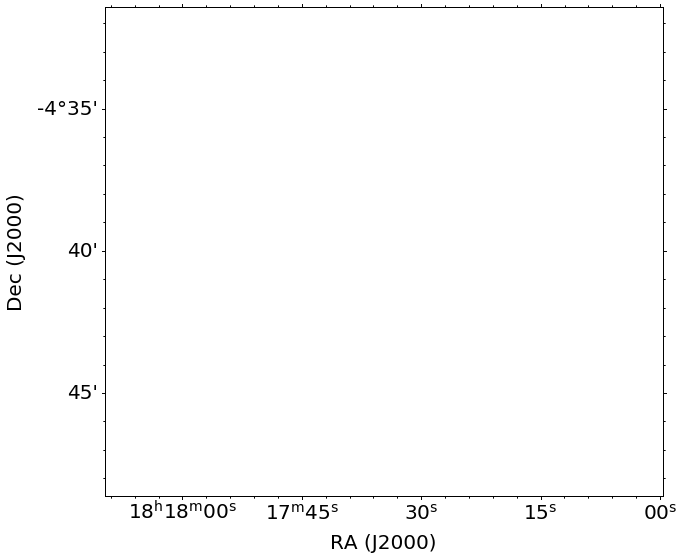

In [43]:
fig = plt.figure(figsize=(10, 10))
image = aplpy.FITSFigure('l483_iext_mJysqa_8as.fits')
image.add_grid()
image.show_circles(x_world, y_world, radius)
image.show_colorscale(cmap='binary')


plt.text(50.2,83.7,'IP > 3-sigma',color='black',fontsize=10)
plotLine(56.7,84,m.radians(90),5/3, 'white',1.2)

plt.text(50.2,85.7,'IP > 4-sigma',color='black',fontsize=10)
plotLine(56.7,86,m.radians(90),5/3, 'white',2.2)


plt.title('Polarization Data of L483',fontsize = 20)
plt.xlim([50,90])
plt.ylim([47,87])
plt.xlabel('Ra positions',fontsize = 15)
plt.ylabel('Dec positions',fontsize = 15)

#circ.Circle(pixRaOut,pixDecOut,radius = 5)
plotLineList(pixelRaNormAng2, pixelDecNormAng2, Iwcs, angleListNormAng2, lengthListNormAng2, 'white',1.2)
plotLineList(pixelRaNormAng4, pixelDecNormAng4, Iwcs, angleListNormAng4, lengthListNormAng4, 'white',2.2)
plt.plot(pixRaOut,pixDecOut, marker = '*', color  = 'orange')
plotArrow(pixRaOut,pixDecOut,-angleOut,lengthOut)
plt.show()